<a href="https://colab.research.google.com/github/93model/93model/blob/master/ai_sc13x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SC13x Linear Algebra

## 1. $\vec{c} \cdot \vec{d}$ 를 구해보세요. 이 두 개의 vector는 orthogonal 관계 (직교)에 있나요? 왜 그런가요? 왜 아닌가요?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [1]:
import numpy as np

c = [3,7,-2,12]
d = [9,-7,4,6]
orth_or_not=np.dot(c,d)
print(orth_or_not,"두 벡터의 내적값이 0이 아니기 때문에 직교 관계에 있지 않다")


42 두 벡터의 내적값이 0이 아니기 때문에 직교 관계에 있지 않다


## 2. $E^{-1}$ 와 $E^{T}$ 를 구하세요.

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [7]:
E = np.array([[7,4,2],[1,3,-1],[2,6,-4]])

e_inv = np.linalg.inv(E)
e_inv

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

In [8]:
E.T

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

## 3. $|F|$ 를 구하세요. 이 데이터는 어떤 의미가 있나요?

\begin{align}
F = 
\begin{bmatrix}
    2 & -2 & 5 \\
    4 & 1 & 10 \\
    12 & 6 & 30
\end{bmatrix}
\end{align}

In [22]:

# numpy의 메소드로 Determinant 계산
F = np.array([[2,-2,5],
              [4,1,10],
              [12,6,30]])
ff= float(np.linalg.det(F))

print(ff,  "\n행렬 determinant를 의미한다.")

0.0 
행렬 determinant를 의미한다.


## 4. 다음 데이터의 covariance, correlation을 구하세요.

- x = [820, 760, 1250, 990, 1080, 1450, 1600]

- y = [0, 1, 7, 1, 0, 6, 4]

In [23]:
x = [820, 760, 1250, 990, 1080, 1450, 1600]

y = [0, 1, 7, 1, 0, 6, 4]

cov= np.cov(x, y)[0,1]
print("공분산:",cov)

공분산: 670.2380952380952


In [24]:
cor= np.corrcoef(x, y)[0,1]
print('상관계수:',cor)

상관계수: 0.7284634644730714


## 5. 다음 데이터를 정규화 하세요.

아래 링크를 참조하세요.

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [26]:
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

df


,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [33]:
scaled_cols = df.columns.drop('Country') # 정규화에 사용할 컬럼을 따로 비번
scaled_cols

Index(['Cheese', 'Carcass_Meat', 'Other_Meat', 'Fish', 'Fats_and_Oils',
       'Sugars', 'Fresh_Potatoes', 'Fresh_Veg', 'Other_Veg',
       'Processed_Potatoes', 'Processed_Veg', 'Fresh_Fruit', 'Cereals',
       'Beverages', 'Soft_Drinks', 'Alcoholic Drinks', 'Confectionery'],
      dtype='object')

In [70]:
from sklearn.preprocessing import StandardScaler, Normalizer

features = df.loc[:,'Cheese':'Confectionery'] # Country 뺌
country = df['Country']
scaler = StandardScaler()
Z = scaler.fit_transform(features)

df_no = pd.DataFrame(Z, columns=scaled_cols )  # 컬럼을 넣어준다

df_no.insert( 0, 'Counrty', country ) # 컨트리 넣어줌
df_no


,Counrty,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,Wales,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,Scotland,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,North Ireland,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


In [67]:
from sklearn.compose import ColumnTransformer  # https://stackoverflow.com/questions/38420847/apply-standardscaler-to-parts-of-a-data-set

ct = ColumnTransformer([
        ("transformer", StandardScaler(), scaled_cols)
    ], remainder='passthrough')

df[scaled_cols] = ct.fit_transform(df[scaled_cols])
df

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,Wales,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,Scotland,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,North Ireland,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


## 6. 위 데이터에 PCA 를 적용 후 scatterplot을 그리세요.

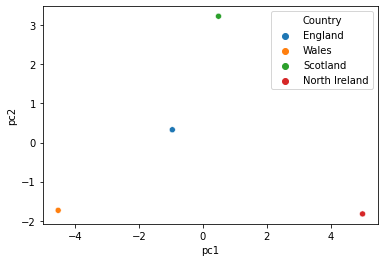

In [68]:
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
printcipalComponents = pca.fit_transform(df_no[scaled_cols]) # Country 열빼고 숫자만 사용

pcadf = pd.DataFrame(data=printcipalComponents, columns = ['pc1', 'pc2'])

sns.scatterplot(x=pcadf.pc1, y=pcadf.pc2, hue=country )

In [71]:
pcadf

,pc1,pc2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


## 7. 아래 데이터에 대해 k-means clustering을 적용 후, 결과를 그래프로 그리세요.



In [75]:
points = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc13x/data.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [76]:
points.shape

(200, 2)

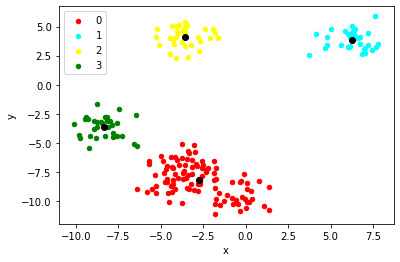

In [77]:
from sklearn.cluster import KMeans 

def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

def plot_clusters(df, column_header, centroids):
  colors = {0 : 'red', 1 : 'cyan', 2 : 'yellow',3:'green'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok") # 기존 중심점
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])
  plt.show()


kmeans = KMeans(n_clusters = 4)
kmeans.fit(points)
labels = kmeans.labels_

new_series = pd.Series(labels)
points['clusters'] = new_series.values
points.head()

centroids = get_centroids(points, 'clusters')
plot_clusters(points, 'clusters', centroids)

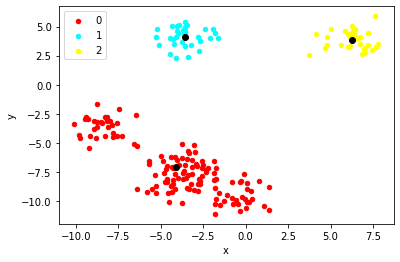

In [79]:
def plot_clusters_3(df, column_header, centroids):
  colors = {0 : 'red', 1 : 'cyan', 2 : 'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok") # 기존 중심점
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])
  plt.show()


kmeans = KMeans(n_clusters = 3)
kmeans.fit(points)
labels = kmeans.labels_

new_series = pd.Series(labels)
points['clusters'] = new_series.values
points.head()

centroids = get_centroids(points, 'clusters')
plot_clusters_3(points, 'clusters', centroids)

# SC 3점 요구사항:
위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아직 시간이 남았다면 아래 2개의 내용들 중 하나를 만족하는 경우 3점을 얻을 수 있습니다.

아래 요구사항들은 모두 optional 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

- 6번의 PCA 결과에 대해서 Scree plot을 추가하세요.

- 7번에서 k값을 선택하는 과정을 논리적으로 설명하세요.


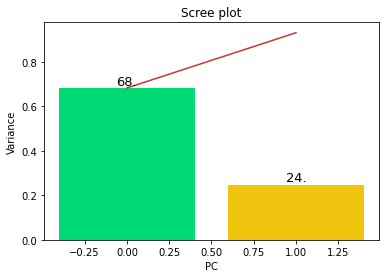

In [80]:
import matplotlib.pyplot as plt

def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
    

scree_plot(pca)

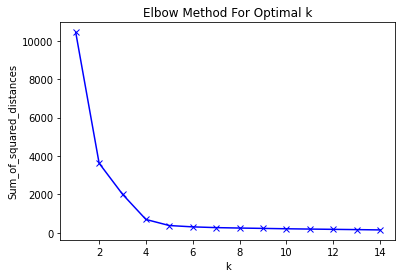

k=4부터 그래프가 급격히 완만해진다


In [81]:
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print("k=4부터 그래프가 급격히 완만해진다")